## 1. Data Scraping

In [48]:
import requests 
from bs4 import BeautifulSoup 

In [49]:
url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'

In [50]:
page = requests.get(url) 
soup = BeautifulSoup(page.text,'html.parser') 
data = [] 
iterator = iter(soup.find_all('td'))  
  
while True: 
    try: 
        country = next(iterator).text 
        cases = next(iterator).text 
        deaths = next(iterator).text 
        continent = next(iterator).text 
        data.append(( 
            country, 
            (cases.replace(', ', '')), 
            (deaths.replace(',', '')), 
            continent
        )) 
    except StopIteration: 
        break

### Analyse data

In [51]:
import pandas as pd
data.sort(key = lambda row: row[1], reverse = True)
dff=pd.DataFrame(data,columns=['country','cases','Deaths','Continment'],dtype=float)

dff['cases'] = [x.replace(',', '') for x in dff['cases']]
dff['cases'] = pd.to_numeric(dff['cases'])
dff

country    cases   Deaths         Continment
0                  Libya    97192   1399.0             Africa
1           Saint Martin      961     12.0      North America
2                Algeria    96549   2696.0             Africa
3           South Africa   954258  25657.0             Africa
4                Eritrea      951      1.0             Africa
..                   ...      ...      ...                ...
214             Mongolia     1069      0.0               Asia
215  Sao Tome & Principe     1012     17.0             Africa
216                 Peru  1002263  37273.0      South America
217              Ukraine  1001132  17395.0             Europe
218              Vanuatu        1      0.0  Australia/Oceania

[219 rows x 4 columns]

In [52]:
#sort data

In [53]:
dfff=dff.sort_values(by='cases',ascending=False)
dfff['Death_rate']= (dfff['Deaths']/dfff['cases'])*100
dfff.head(3)

country     cases    Deaths     Continment  Death_rate
143  United States  18957956  334981.0  North America    1.766968
199          India  10145006  147097.0           Asia    1.449945
32          Brazil   7374775  189419.0  South America    2.568472

## 2. Data Visualization

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [55]:
#virtualization 1

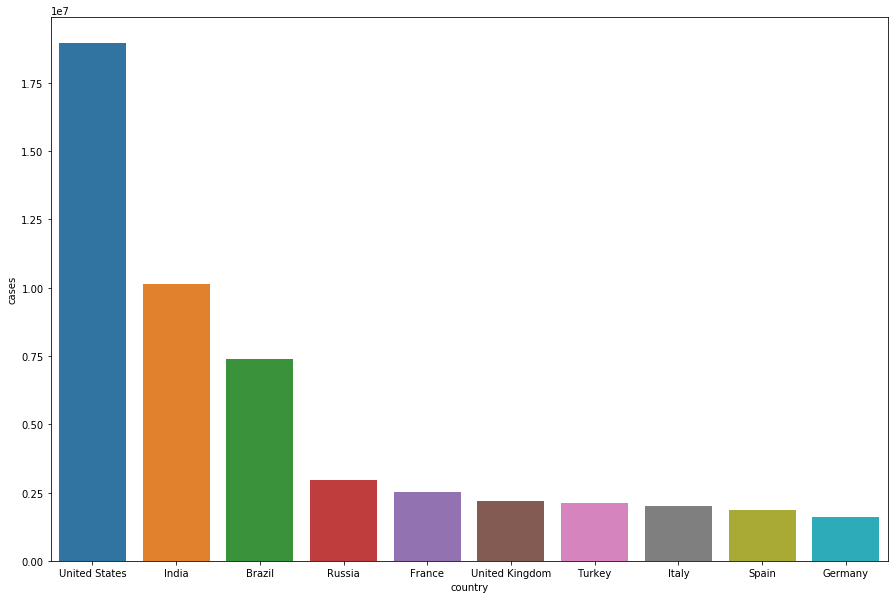

In [56]:
sns.barplot(x='country',y='cases',data=dfff.head(10))

In [57]:
#virtulization 2

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib.pyplot import figure

C:\Users\ounja\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ounja\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ounja\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1600x480 with 0 Axes>

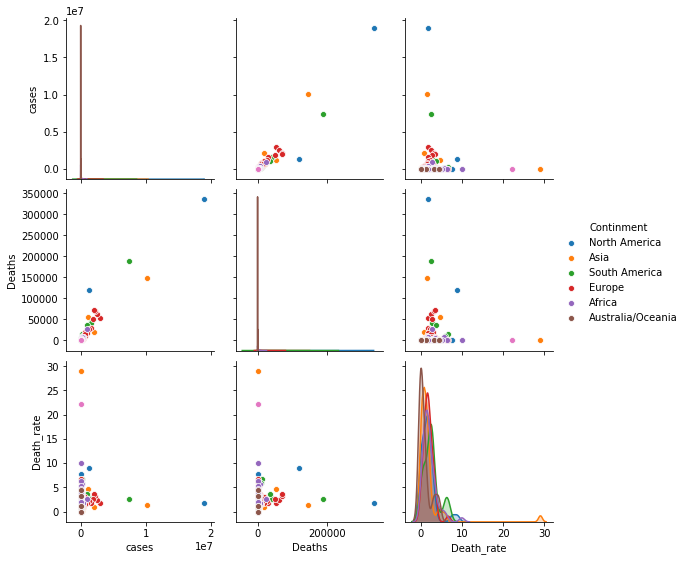

In [59]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
sns.pairplot(dfff,hue='Continment')